In [1]:
import pandas as pd

This data set lists the individual observations for 934 children in 205 families on which Galton (1886) based his cross-tabulation.

In addition to the question of the relation between heights of parents and their offspring, for which this data is mainly famous, Galton had another purpose which the data in this form allows to address: Does marriage selection indicate a relationship between the heights of husbands and wives, a topic he called assortative mating? Keen [p. 297-298](2010) provides a brief discussion of this topic. 

`family`: family ID, a factor with levels 001-204 <br/>
`father`: height of father <br/>
`mother`: height of mother <br/>
`midparentHeight`: mid-parent height, calculated as (father + 1.08*mother)/2 <br/>
`children`: number of children in this family <br/>
`childNum`: number of this child within family. Children are listed in decreasing order of height for boys followed by girls <br/>
`gender`: child gender, a factor with levels female male <br/>
`childHeight`: height of child <br/>

In [3]:
df = pd.read_csv("galton.csv")
df

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,1,78.5,67.0,75.43,4,1,male,73.2
1,1,78.5,67.0,75.43,4,2,female,69.2
2,1,78.5,67.0,75.43,4,3,female,69.0
3,1,78.5,67.0,75.43,4,4,female,69.0
4,2,75.5,66.5,73.66,4,1,male,73.5
...,...,...,...,...,...,...,...,...
929,203,62.0,66.0,66.64,3,1,male,64.0
930,203,62.0,66.0,66.64,3,2,female,62.0
931,203,62.0,66.0,66.64,3,3,female,61.0
932,204,62.5,63.0,65.27,2,1,male,66.5


### Child height Prediction: given `midparentHeight`, the predicted child height is the average heights of childrens whose midparent height is similar (assume: 0.5 inches deviation)

**Step1**: From given `midparentHeight`, find out childrens whose `midparentHeight` is within 0.5 inches deviation <br/>
**Step2**: Compute the mean height of those childrens. The mean value is the predicted child height.

In [4]:
def predictChildHeight(midparentHeight):
    similar_ones = df[(df["midparentHeight"] >= midparentHeight-0.5) & (df["midparentHeight"] <= midparentHeight+0.5)]
    
    return similar_ones["childHeight"].mean()

In [5]:
predictChildHeight(75.43)

70.1

In [6]:
prediction = []

for index, row in df.iterrows():
    predicted_height = predictChildHeight(row["midparentHeight"])
    prediction.append(predicted_height)
    
df["Prediction"] = prediction

In [7]:
df

,family,father,mother,midparentHeight,children,childNum,gender,childHeight,Prediction
0,1,78.5,67.0,75.43,4,1,male,73.2,70.100000
1,1,78.5,67.0,75.43,4,2,female,69.2,70.100000
2,1,78.5,67.0,75.43,4,3,female,69.0,70.100000
3,1,78.5,67.0,75.43,4,4,female,69.0,70.100000
4,2,75.5,66.5,73.66,4,1,male,73.5,70.415789
...,...,...,...,...,...,...,...,...,...
929,203,62.0,66.0,66.64,3,1,male,64.0,65.156579
930,203,62.0,66.0,66.64,3,2,female,62.0,65.156579
931,203,62.0,66.0,66.64,3,3,female,61.0,65.156579
932,204,62.5,63.0,65.27,2,1,male,66.5,64.229630


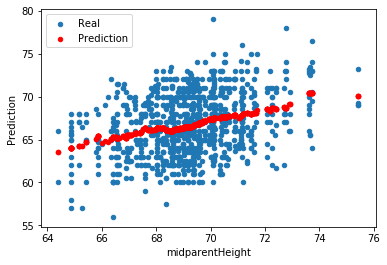

In [15]:
ax1 = df.plot.scatter(x="midparentHeight", y="childHeight", label="Real")
df.plot.scatter(x="midparentHeight", y="Prediction", ax=ax1, color="red", label="Prediction")

### Use standard units

In [16]:
df["midparentHeight_su"] =  (df["midparentHeight"] - df["midparentHeight"].mean()) / df["midparentHeight"].std()
df["childHeight_su"] =  (df["childHeight"] - df["childHeight"].mean()) / df["childHeight"].std()

In [18]:
df["midparentHeight"].std()

1.8023702216066164

`1 SD` midparent is `1.8` inches; hence `0.5` inches is `0.5 / 1.8 = 0.28` SDs

In [27]:
def predictChildHeight_SU(midparentHeightSU):
    similar_ones = df[(df["midparentHeight_su"] >= midparentHeightSU-0.28) & (df["midparentHeight_su"] <= midparentHeightSU+0.28)]
    
    return similar_ones["childHeight_su"].mean()

In [28]:
prediction = []

for index, row in df.iterrows():
    predicted_height = predictChildHeight_SU(row["midparentHeight_su"])
    prediction.append(predicted_height)
    
df["Prediction_SU"] = prediction

In [29]:
df

,family,father,mother,midparentHeight,children,childNum,gender,childHeight,Prediction,midparentHeight_su,childHeight_su,Prediction_SU
0,1,78.5,67.0,75.43,4,1,male,73.2,70.100000,3.452802,1.803190,0.937087
1,1,78.5,67.0,75.43,4,2,female,69.2,70.100000,3.452802,0.685637,0.937087
2,1,78.5,67.0,75.43,4,3,female,69.0,70.100000,3.452802,0.629760,0.937087
3,1,78.5,67.0,75.43,4,4,female,69.0,70.100000,3.452802,0.629760,0.937087
4,2,75.5,66.5,73.66,4,1,male,73.5,70.415789,2.470762,1.887006,1.025314
...,...,...,...,...,...,...,...,...,...,...,...,...
929,203,62.0,66.0,66.64,3,1,male,64.0,65.156579,-1.424110,-0.767180,-0.444046
930,203,62.0,66.0,66.64,3,2,female,62.0,65.156579,-1.424110,-1.325957,-0.444046
931,203,62.0,66.0,66.64,3,3,female,61.0,65.156579,-1.424110,-1.605345,-0.444046
932,204,62.5,63.0,65.27,2,1,male,66.5,64.229630,-2.184220,-0.068710,-0.703025


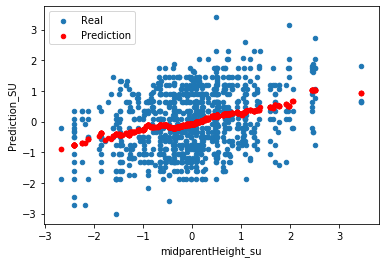

In [30]:
ax1 = df.plot.scatter(x="midparentHeight_su", y="childHeight_su", label="Real")
df.plot.scatter(x="midparentHeight_su", y="Prediction_SU", ax=ax1, color="red", label="Prediction")

Tall parents have children who are not quite as exceptionally tall, on average. called this as *regression to mediocrity*.

Exceptionally short parents had children who were somewhat taller relative to their generation, on average. In general, individuals who are away from average on one variable are expected to be not quite as far away from average on the other. This is called the **regression effect**.

In [34]:
df.corr()

,father,mother,midparentHeight,children,childNum,childHeight,Prediction,midparentHeight_su,childHeight_su,Prediction_SU
father,1.000000,0.060366,0.728439,-0.151333,-0.087446,0.266039,0.711650,0.728439,0.266039,0.711650
mother,0.060366,1.000000,0.727834,-0.033582,-0.019405,0.201322,0.705613,0.727834,0.201322,0.705613
midparentHeight,0.728439,0.727834,1.000000,-0.127016,-0.073395,0.320950,0.973214,1.000000,0.320950,0.973214
children,-0.151333,-0.033582,-0.127016,1.000000,0.577838,-0.126720,-0.120593,-0.127016,-0.126720,-0.120593
childNum,-0.087446,-0.019405,-0.073395,0.577838,1.000000,-0.625026,-0.069683,-0.073395,-0.625026,-0.069683
childHeight,0.266039,0.201322,0.320950,-0.126720,-0.625026,1.000000,0.322051,0.320950,1.000000,0.322051
Prediction,0.711650,0.705613,0.973214,-0.120593,-0.069683,0.322051,1.000000,0.973214,0.322051,1.000000
midparentHeight_su,0.728439,0.727834,1.000000,-0.127016,-0.073395,0.320950,0.973214,1.000000,0.320950,0.973214
childHeight_su,0.266039,0.201322,0.320950,-0.126720,-0.625026,1.000000,0.322051,0.320950,1.000000,0.322051
Prediction_SU,0.711650,0.705613,0.973214,-0.120593,-0.069683,0.322051,1.000000,0.973214,0.322051,1.000000


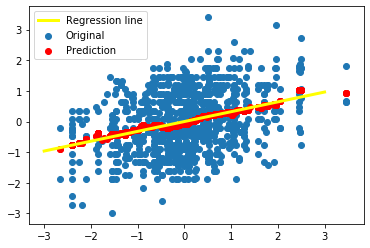

In [36]:
import matplotlib.pyplot as plt

plt.scatter(x=df["midparentHeight_su"], y=df["childHeight_su"], label="Original")
plt.scatter(x=df["midparentHeight_su"], y=df["Prediction_SU"], color="red", zorder=1, label="Prediction")
plt.plot([-3, 3], [-3*0.320950, 3*0.320950], color="yellow", lw=3, zorder=3, label="Regression line")
plt.legend()
plt.show()

**Regression Line**

In regression, we use the value of one variable (which we will call `x`) to predict the value of another (which we will call `y`). When the variables `x` and `y` are measured in standard units, the regression line for predicting `y` based on `x` has slope `r` and passes through the origin.